# 분류

## 데이터 준비

인식에 사용할 데이터 다운로드.

In [ ]:
!rm -rf imagenet
!mkdir imagenet

# 버섯
!wget -O imagenet/mushroom1.jpg http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
!wget -O imagenet/mushroom2.jpg http://farm3.static.flickr.com/2416/1593642808_efcef6c9c2.jpg
!wget -O imagenet/mushroom3.jpg http://farm4.static.flickr.com/3003/2536991564_5f9b2f5b53.jpg
  
# 강아지
!wget -O imagenet/dog1.jpg http://farm1.static.flickr.com/58/160964915_d708f48d0d.jpg
!wget -O imagenet/dog2.jpg http://farm1.static.flickr.com/51/144906086_049df05364.jpg
!wget -O imagenet/dog3.jpg http://farm3.static.flickr.com/2133/2236535445_ca650757f2.jpg
  
# 고양이  
!wget -O imagenet/cat1.jpg http://farm1.static.flickr.com/131/393656824_bd89c512d0.jpg
!wget -O imagenet/cat2.jpg http://farm1.static.flickr.com/213/505539125_d7193beb76.jpg
!wget -O imagenet/cat3.jpg http://farm1.static.flickr.com/24/63785988_c16c10b4e5.jpg
  

--2021-12-24 05:13:41--  http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Resolving farm4.static.flickr.com (farm4.static.flickr.com)... 13.224.162.83, 2600:9000:2135:a400:0:5a51:64c9:c681, 2600:9000:2135:600:0:5a51:64c9:c681, ...
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|13.224.162.83|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg [following]
--2021-12-24 05:13:41--  https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|13.224.162.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘imagenet/mushroom1.jpg’

imagenet/mushroom1.     [ <=>                ]  59.96K  --.-KB/s    in 0.01s   

2021-12-24 05:13:41 (4.04 MB/s) - ‘imagenet/mushroom1.jpg’ saved [61397]

--2021-12-24 05:13:41--  http://farm3.static.flickr.com/

## 예측 위한 함수 선언

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def predict_vgg16(model, filename) :

  
  # 모델 사이즈로 이미지 파일을 읽기
  image = load_img(filename, target_size=(224, 224))
  # image = PIL.Image.Image image mode=RGB size=224x224

  
  # 이미지 데이터를 numpy로 변환
  image = img_to_array(image)
  # [
  #   [[211. 184. 163.]
  #   [225. 193. 170.]
  #   ...
  #   [237. 202. 180.]]
  #   ...
  # ]  
  #
  # image.shape = (224, 224, 3)
  
  # 화면에 이미지 보여주기
  plt.imshow(image.astype(int))
  plt.show()

  # vgg16.preprocess_input()을 호출하기 위해 차원을 조정
  # 보통 모델을 여러 이미지를 한번에 호출. 
  # 맨 앞의 1 : 이미지 갯수가 1개라는 것.
  # 두번째 224 : 세로
  # 세번째 224 : 가로
  # 네번째 3 : R, G, B 채널 3개
  image = image.reshape((1, 224, 224, 3))

  # VGG16 모델 호출을 위해 데이터 전처리.
  # -255 ~ 255 사이 값으로 정규화한다.
  # 그리고 RGB를 BGR순으로 바꾼다.
  image = vgg16.preprocess_input(image)
  
  
  # 이미지를 모델에 적용
  yhat = model.predict(image)
  # yhat = [[2.03485320e-06 4.21382174e-06 1.45730738e-07 1.04057870e-06
  #          6.61934010e-08 2.63145339e-04 4.49358195e-05 2.03222541e-08
  #          ... ]] # 1000개 클래스에 대한 결과값.
  #
    
    
  # 모델 적용된 결과를 파싱
  label = vgg16.decode_predictions(yhat)
  # label = [[('n02655020', 'puffer', 0.9612253), ... ]]

  # 가장 확률이 높은 결과를 획득
  label = label[0][0]
  # label = ('n02655020', 'puffer', 0.9612253)

  # 라벨과 라벨을 예측한 확률을 출력
  print('%s (%.2f%%)' % (label[1], label[2]*100))    

   

## 분류 실행

553476096/553467096 [==============================] - 15s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

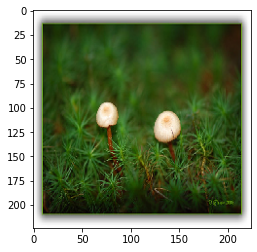

49152/35363 [=========================================] - 0s 0us/step
acorn (33.70%)


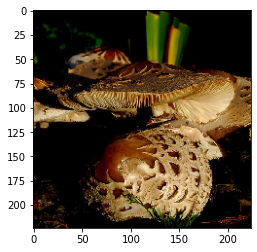

mushroom (71.41%)


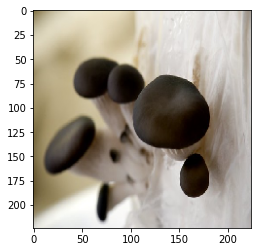

birdhouse (23.68%)


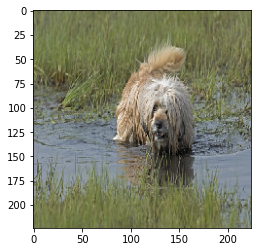

Tibetan_terrier (80.98%)


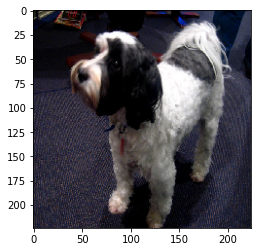

Tibetan_terrier (86.20%)


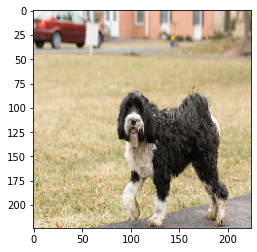

standard_poodle (23.26%)


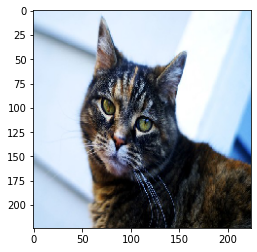

tabby (56.46%)


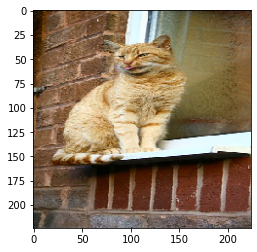

tiger_cat (39.90%)


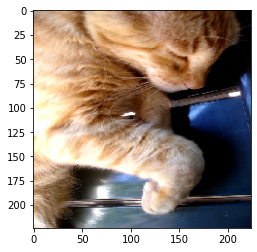

tiger_cat (18.95%)


In [ ]:
from tensorflow.keras.applications import vgg16

# VGG16 모델 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

# 테스트 할 이미지 파일들
files = [
      'imagenet/mushroom1.jpg',
      'imagenet/mushroom2.jpg',
      'imagenet/mushroom3.jpg',
      'imagenet/dog1.jpg',
      'imagenet/dog2.jpg',
      'imagenet/dog3.jpg',
      'imagenet/cat1.jpg',
      'imagenet/cat2.jpg',
      'imagenet/cat3.jpg',
    ]

# 분류 실행
for file in files :
  predict_vgg16(model, file)  

In [ ]:
model = keras.Sequential()
model.add(Input(500,500,3))
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Conv2D(64,(3,3), padding='same'))
model.add(MaxPolling2D((2,2)))
model.add(Conv2D(128,(3,3), padding='same'))
model.add(Conv2D(128,(3,3), padding='same'))
model.add(MaxPolling2D((2,2)))
model.add(Conv2D(256,(3,3), padding='same'))
model.add(Conv2D(256,(3,3), padding='same'))
model.add(Conv2D(256,(3,3), padding='same'))
model.add(MaxPolling2D((2,2)))
model.add(Conv2D(512,(3,3), padding='same'))
model.add(Conv2D(512,(3,3), padding='same'))
model.add(Conv2D(512,(3,3), padding='same'))
model.add(MaxPolling2D((2,2)))
model.add(Conv2D(512,(3,3), padding='same'))
model.add(Conv2D(512,(3,3), padding='same'))
model.add(Conv2D(512,(3,3), padding='same'))
model.add(MaxPolling2D((2,2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation="softmax"))

# 커스텀 데이터 학습 - train_x, train_y에 의한

다음에서 다운받은 데이터의 일부

http://vision.stanford.edu/aditya86/ImageNetDogs

<br>

데이터는 다음과 같이 구성됨

```
dogs/
    class1/
        file1.jpg
        file2.jpg
         ...
    class2/ 
        file21.jpg
        file22.jpg
         ...    
    class3/
        file31.jpg
        file32.jpg
         ...
    ...

```

## 커스텀 데이터 다운로드

dogs.tar.gz

In [ ]:
!rm -rf dogs.tar.gz
!wget https://github.com/dhrim/kopo_2021/raw/master/material/deep_learning/dogs.tar.gz
!ls -al  

--2020-11-26 01:28:47--  https://github.com/dhrim/kopo_2021/raw/master/material/deep_learning/dogs.tar.gz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/kopo_2021/master/material/deep_learning/dogs.tar.gz [following]
--2020-11-26 01:28:47--  https://raw.githubusercontent.com/dhrim/kopo_2021/master/material/deep_learning/dogs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62885106 (60M) [application/octet-stream]
Saving to: ‘dogs.tar.gz’

dogs.tar.gz         100%[===================>]  59.97M   142MB/s    in 0.4s    

2020-11-26 01:28:49 (142 MB/s) - ‘dogs.tar.gz’ saved [62885106/62

In [ ]:
!rm -rf dogs
!tar xvfz dogs.tar.gz
!ls -al dogs

dogs/
dogs/n02085620-Chihuahua/
dogs/n02085782-Japanese_spaniel/
dogs/n02085936-Maltese_dog/
dogs/n02086079-Pekinese/
dogs/n02086240-Shih-Tzu/
dogs/n02086646-Blenheim_spaniel/
dogs/n02086910-papillon/
dogs/n02087046-toy_terrier/
dogs/n02087394-Rhodesian_ridgeback/
dogs/n02088094-Afghan_hound/
dogs/n02088094-Afghan_hound/n02088094_1003.jpg
dogs/n02088094-Afghan_hound/n02088094_1007.jpg
dogs/n02088094-Afghan_hound/n02088094_1023.jpg
dogs/n02088094-Afghan_hound/n02088094_10263.jpg
dogs/n02088094-Afghan_hound/n02088094_10715.jpg
dogs/n02088094-Afghan_hound/n02088094_10822.jpg
dogs/n02088094-Afghan_hound/n02088094_10832.jpg
dogs/n02088094-Afghan_hound/n02088094_10982.jpg
dogs/n02088094-Afghan_hound/n02088094_11006.jpg
dogs/n02088094-Afghan_hound/n02088094_11172.jpg
dogs/n02088094-Afghan_hound/n02088094_11182.jpg
dogs/n02088094-Afghan_hound/n02088094_1126.jpg
dogs/n02088094-Afghan_hound/n02088094_1128.jpg
dogs/n02088094-Afghan_hound/n02088094_11432.jpg
dogs/n02088094-Afghan_hound/n02088094_1

## 데이터 로딩 함수 정의

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16

In [ ]:
def load_file_names_and_category_names(path):
  
  file_names = []
  category_names = []

  dir_names = os.listdir(path)
      
  for dir_name in dir_names:
    file_names_in_a_dir = os.listdir(path+"/"+dir_name)

    for a_file_name in file_names_in_a_dir:
      full_file_name = path+"/"+dir_name+"/"+a_file_name
      file_names.append(full_file_name)
      category_names.append(dir_name)

  combined = list(zip(file_names, category_names))
  random.shuffle(combined)
  file_names, category_names = zip(*combined)

  return file_names, category_names


def load_image_files_into_numpy_array(file_names):
  file_count = len(file_names)    
  data = np.ndarray(shape=(file_count,224,224,3), dtype=np.float64)    
  for i in range(len(file_names)):
    image = load_img(file_names[i], target_size=(224, 224))
    image = img_to_array(image)
    data[i] = image
  return data


def load_custom_data(path, train_ratio=0.8):
  
  file_names, category_names = load_file_names_and_category_names(path)
  x = load_image_files_into_numpy_array(file_names)
  
  labels, y = np.unique(category_names, return_inverse=True)  

  s = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y), labels



In [ ]:
# model.add(Input((224,224,3)))
# model.add(Conv2D(64, (3,3), padding='same'))
# model.add(Conv2D(64, (3,3), padding='same'))
# model.add(MaxPolling2D((2,2)))
# model.add(Conv2D(128, (3,3), padding='same'))
# model.add(Conv2D(128, (3,3), padding='same'))
# model.add(MaxPolling2D((2,2)))
# model.add(Conv2D(256, (3,3), padding='same'))
# model.add(Conv2D(256, (3,3), padding='same'))
# model.add(Conv2D(256, (3,3), padding='same'))
# model.add(MaxPolling2D((2,2)))
# ...
# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(10, activation="softmax"))

In [ ]:
(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(custom_labels)  

(1535, 224, 224, 3)
(1535,)
(384, 224, 224, 3)
(384,)
['n02085620-Chihuahua' 'n02085782-Japanese_spaniel'
 'n02085936-Maltese_dog' 'n02086079-Pekinese' 'n02086240-Shih-Tzu'
 'n02086646-Blenheim_spaniel' 'n02086910-papillon' 'n02087046-toy_terrier'
 'n02087394-Rhodesian_ridgeback' 'n02088094-Afghan_hound']


## 모델 구조 정의

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from tensorflow.keras.applications import VGG16
# 모델 불러오기
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.summary()

# Convolution Layer를 학습되지 않도록 고정 
for layer in conv_layers.layers:
    layer.trainable = False


# 새로운 모델 생성하기
model = models.Sequential()

# VGG16모델의 Convolution Layer를 추가
model.add(conv_layers)
 
# 모델의 Fully Connected 부분을 재구성
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 모델
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="RMSprop",
              metrics=['acc'])

# 모델 학습
hist = model.fit(train_x, train_y, epochs=200, batch_size=64, shuffle=True, validation_split=0.1)

Train on 1381 samples, validate on 154 samples
Epoch 1/200
1381/1381 [==============================] - 5s 4ms/sample - loss: 156.7728 - acc: 0.5431 - val_loss: 8.9167 - val_acc: 0.8571
Epoch 2/200
1381/1381 [==============================] - 5s 3ms/sample - loss: 5.4286 - acc: 0.8928 - val_loss: 24.1538 - val_acc: 0.7792
Epoch 3/200
1381/1381 [==============================] - 5s 3ms/sample - loss: 6.4842 - acc: 0.8921 - val_loss: 9.2345 - val_acc: 0.8571
Epoch 4/200
1381/1381 [==============================] - 5s 3ms/sample - loss: 4.4275 - acc: 0.9146 - val_loss: 11.2459 - val_acc: 0.8442
Epoch 5/200
1381/1381 [==============================] - 5s 3ms/sample - loss: 5.1077 - acc: 0.9254 - val_loss: 11.5740 - val_acc: 0.8571
Epoch 6/200
1381/1381 [==============================] - 5s 3ms/sample - loss: 4.6142 - acc: 0.9305 - val_loss: 12.7181 - val_acc: 0.8312
Epoch 7/200
1381/1381 [==============================] - 5s 3ms/sample - loss: 3.8187 - acc: 0.9471 - val_loss: 13.0179 - val

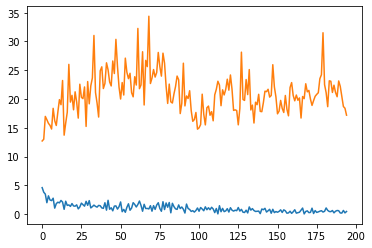

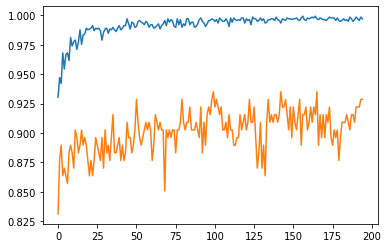

In [ ]:
plt.plot(hist.history['loss'][5:])
plt.plot(hist.history['val_loss'][5:])
plt.show()

plt.plot(hist.history['accuracy'][5:])
plt.plot(hist.history['val_accuracy'][5:])
plt.show()


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# 모델 컴파일
optimizer = RMSprop(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

# 모델 학습
hist = model.fit(train_x, train_y, epochs=50, batch_size=64, shuffle=True, validation_split=0.1)

Train on 1381 samples, validate on 154 samples
Epoch 1/50
1381/1381 [==============================] - 5s 3ms/sample - loss: 0.2679 - acc: 0.9964 - val_loss: 17.5436 - val_acc: 0.9286
Epoch 2/50
1381/1381 [==============================] - 5s 3ms/sample - loss: 0.2458 - acc: 0.9971 - val_loss: 17.5318 - val_acc: 0.9286
Epoch 3/50
1381/1381 [==============================] - 5s 3ms/sample - loss: 0.1763 - acc: 0.9978 - val_loss: 17.5854 - val_acc: 0.9221
Epoch 4/50
1381/1381 [==============================] - 5s 3ms/sample - loss: 0.0641 - acc: 0.9986 - val_loss: 17.8513 - val_acc: 0.9221
Epoch 5/50
1381/1381 [==============================] - 5s 3ms/sample - loss: 0.1723 - acc: 0.9964 - val_loss: 18.2102 - val_acc: 0.9156
Epoch 6/50
1381/1381 [==============================] - 5s 3ms/sample - loss: 0.3741 - acc: 0.9957 - val_loss: 18.4344 - val_acc: 0.9221
Epoch 7/50
1381/1381 [==============================] - 4s 3ms/sample - loss: 0.2322 - acc: 0.9971 - val_loss: 18.4869 - val_acc: 0

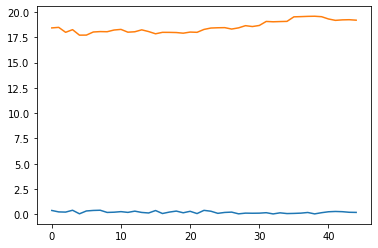

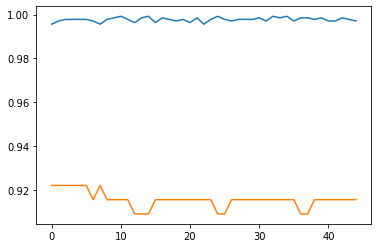

In [ ]:
plt.plot(hist.history['loss'][5:])
plt.plot(hist.history['val_loss'][5:])
plt.show()

plt.plot(hist.history['accuracy'][5:])
plt.plot(hist.history['val_accuracy'][5:])
plt.show()


## 결과 확인

In [ ]:
print(y_.shape)

(384, 10)


384/384 [==============================] - 2s 5ms/sample - loss: 26.1299 - acc: 0.8646
loss = 26.129876375198364
acc = 0.8645833
1 n02085782-Japanese_spaniel
1 n02085782-Japanese_spaniel


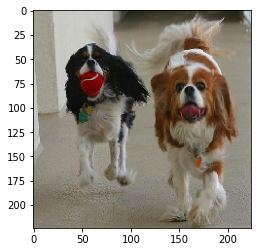

1 n02085782-Japanese_spaniel
1 n02085782-Japanese_spaniel


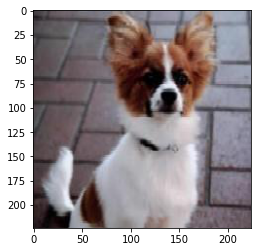

5 n02086646-Blenheim_spaniel
5 n02086646-Blenheim_spaniel


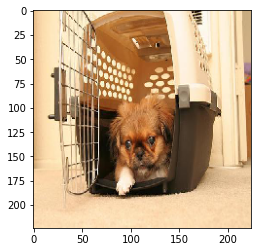

6 n02086910-papillon
6 n02086910-papillon


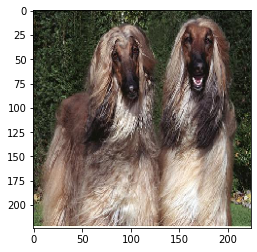

7 n02087046-toy_terrier
7 n02087046-toy_terrier


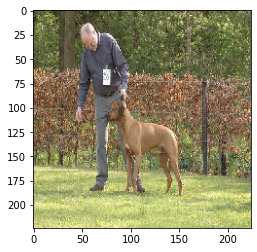

In [ ]:
import matplotlib.pyplot as plt

loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)

predicted = np.argmax(y_, axis=1)


# train_x, test_x는 vgg16.prerprocess_input()에 의해 변형되었다.
(_, _), (raw_test_x, _), custom_labels = load_custom_data("dogs")


for i in [0,50,100,150,200]:  
  print(test_y[i], custom_labels[test_y[i]])
  print(predicted[i], custom_labels[predicted[i]])
  plt.imshow(raw_test_x[i].astype(int))
  plt.show()


# VGG16 커스텀 학습 최소 코드

In [ ]:
def load_file_names_and_category_names(path):
  
  file_names = []
  category_names = []

  dir_names = os.listdir(path)
      
  for dir_name in dir_names:
    file_names_in_a_dir = os.listdir(path+"/"+dir_name)

    for a_file_name in file_names_in_a_dir:
      full_file_name = path+"/"+dir_name+"/"+a_file_name
      file_names.append(full_file_name)
      category_names.append(dir_name)

  return file_names, category_names


def load_image_files_into_numpy_array(file_names):
  file_count = len(file_names)    
  data = np.ndarray(shape=(file_count,224,224,3), dtype=np.float64)    
  for i in range(len(file_names)):
    image = load_img(file_names[i], target_size=(224, 224))
    image = img_to_array(image)
    data[i] = image
  return data


def load_custom_data(path, train_ratio=0.8):
  
  file_names, category_names = load_file_names_and_category_names(path)
  x = load_image_files_into_numpy_array(file_names)
  
  labels, y = np.unique(category_names, return_inverse=True)  

  s = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y), labels

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16

conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)


model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)


loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])




Epoch 1/10
1535/1535 [==============================] - 10s 6ms/sample - loss: 109.4126 - acc: 0.6788
Epoch 2/10
1535/1535 [==============================] - 10s 6ms/sample - loss: 6.9123 - acc: 0.9140
Epoch 3/10
1535/1535 [==============================] - 10s 6ms/sample - loss: 3.2202 - acc: 0.9459
Epoch 4/10
1535/1535 [==============================] - 10s 6ms/sample - loss: 3.6440 - acc: 0.9433
Epoch 5/10
1535/1535 [==============================] - 10s 6ms/sample - loss: 3.2799 - acc: 0.9511
Epoch 6/10
1535/1535 [==============================] - 9s 6ms/sample - loss: 1.5908 - acc: 0.9694
Epoch 7/10
1535/1535 [==============================] - 9s 6ms/sample - loss: 1.6007 - acc: 0.9752
Epoch 8/10
1535/1535 [==============================] - 9s 6ms/sample - loss: 2.3399 - acc: 0.9746
Epoch 9/10
1535/1535 [==============================] - 9s 6ms/sample - loss: 1.6927 - acc: 0.9733
Epoch 10/10
384/384 [==============================] - 2s 6ms/sample - loss: 378.4857 - acc: 0.0938
lo

# 커스텀 데이터 학습 - train_x, train_y에 데이터 증강

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16



conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

# train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)

# ADD START
data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input # 여기에 preprocess 함수를 설정
)
# ADD END
 

#model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)
model.fit(data_aug_generator.flow(train_x, train_y, batch_size=64), epochs=10)


loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])


Epoch 1/10
24/23 [==============================] - 16s 683ms/step - loss: 134.5925 - acc: 0.5218
Epoch 2/10
24/23 [==============================] - 16s 680ms/step - loss: 8.9526 - acc: 0.7961
Epoch 3/10
24/23 [==============================] - 16s 678ms/step - loss: 6.2449 - acc: 0.8150
Epoch 4/10
24/23 [==============================] - 16s 671ms/step - loss: 4.8384 - acc: 0.8371
Epoch 5/10
24/23 [==============================] - 16s 666ms/step - loss: 4.6577 - acc: 0.8300
Epoch 6/10
24/23 [==============================] - 16s 658ms/step - loss: 2.8475 - acc: 0.8658
Epoch 7/10
24/23 [==============================] - 16s 658ms/step - loss: 3.5233 - acc: 0.8593
Epoch 8/10
24/23 [==============================] - 16s 666ms/step - loss: 3.1740 - acc: 0.8847
Epoch 9/10
24/23 [==============================] - 16s 667ms/step - loss: 3.7278 - acc: 0.8749
Epoch 10/10
384/384 [==============================] - 2s 5ms/sample - loss: 5.1019 - acc: 0.8542
loss = 5.101917622824355
acc = 0.854

# 커스텀 데이터 학습 - 디렉토리 구조를 사용한


<br>

데이터는 다음과 같이 구성됨

```
dogs/
    train/
        class1/
            file1.jpg
            file2.jpg
             ...
        class2/ 
            file21.jpg
            file22.jpg
             ...    
        class3/
            file31.jpg
            file32.jpg
             ...
        ...
    test/
        class1/
            file8.jpg
            file9.jpg
             ...
        class2/ 
            file28.jpg
            file29.jpg
             ...    
        class3/
            file38.jpg
            file39.jpg
             ...
        ...
    
```

## 커스텀 데이터 다운로드

In [ ]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/kopo_2021/raw/master/material/deep_learning/dogs_prepared.tar.gz
!ls -al  

--2021-12-24 05:43:15--  https://github.com/dhrim/kopo_2021/raw/master/material/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/kopo_2021/master/material/deep_learning/dogs_prepared.tar.gz [following]
--2021-12-24 05:43:15--  https://raw.githubusercontent.com/dhrim/kopo_2021/master/material/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   185MB/s    in 0.3s    

2021-12-24 05:43:19 (185 MB/

In [ ]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

## 디렉토리로 준비된 데이터로 커스텀 학습

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


# (train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

# train_x = vgg16.preprocess_input(train_x)
# test_x = vgg16.preprocess_input(test_x)


# ADD START
train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=64,      
      class_mode='sparse'
)


# ADD END
 

#model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)
model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)

# loss, acc = model.evaluate(test_x, test_y)
loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)

# y_ = model.predict(test_x)
y_ = model.predict(test_data_generator)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


58900480/58889256 [==============================] - 0s 0us/step
Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/24 [==============================] - 29s 990ms/step - loss: 119.2309 - acc: 0.5402 - val_loss: 17.8939 - val_acc: 0.7706
Epoch 2/10
24/24 [==============================] - 19s 805ms/step - loss: 12.3133 - acc: 0.7818 - val_loss: 9.7107 - val_acc: 0.8093
Epoch 3/10
24/24 [==============================] - 19s 808ms/step - loss: 6.9224 - acc: 0.8276 - val_loss: 6.5418 - val_acc: 0.8144
Epoch 4/10
24/24 [==============================] - 19s 804ms/step - loss: 6.2376 - acc: 0.8289 - val_loss: 6.6710 - val_acc: 0.8376
Epoch 5/10
24/24 [==============================] - 19s 805ms/step - loss: 5.8141 - acc: 0.8445 - val_loss: 6.9473 - val_acc: 0.8376
Epoch 6/10
24/24 [==============================] - 19s 804ms/step - loss: 5.0112 - acc: 0.8583 - val_loss: 5.5967 - val_acc: 0.8479
Epoch 7/10
24/24 [==============================

# VGG16 전이학습 Template

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)


model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict(test_data_generator)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/24 [==============================] - 20s 823ms/step - loss: 128.0129 - acc: 0.5304 - val_loss: 14.9580 - val_acc: 0.7938
Epoch 2/10
24/24 [==============================] - 19s 808ms/step - loss: 12.0651 - acc: 0.8034 - val_loss: 11.4396 - val_acc: 0.8041
Epoch 3/10
24/24 [==============================] - 20s 810ms/step - loss: 9.7044 - acc: 0.8014 - val_loss: 6.6971 - val_acc: 0.8557
Epoch 4/10
24/24 [==============================] - 19s 808ms/step - loss: 6.5265 - acc: 0.8341 - val_loss: 5.8902 - val_acc: 0.8479
Epoch 5/10
24/24 [==============================] - 19s 805ms/step - loss: 4.7600 - acc: 0.8563 - val_loss: 6.1226 - val_acc: 0.8608
Epoch 6/10
24/24 [==============================] - 20s 815ms/step - loss: 5.6864 - acc: 0.8576 - val_loss: 6.4454 - val_acc: 0.8582
Epoch 7/10
24/24 [==============================] - 20s 825ms/step - loss: 4.0134 - acc: 0.8811 - val_loss: 7.03

Found 388 images belonging to 10 classes.


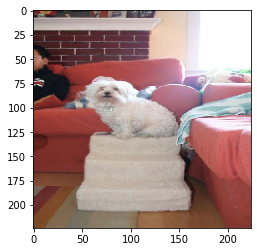

test_y = 2 , predicted = 2


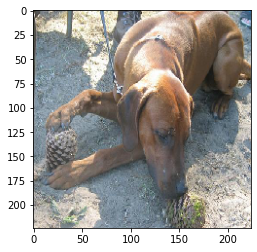

test_y = 8 , predicted = 8


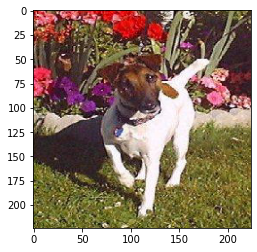

test_y = 7 , predicted = 8


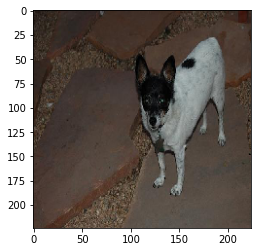

test_y = 7 , predicted = 7


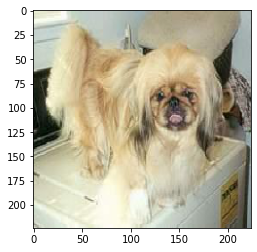

test_y = 3 , predicted = 4


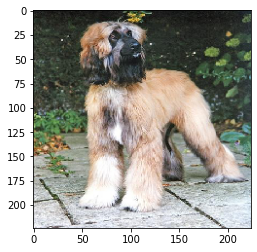

test_y = 9 , predicted = 9


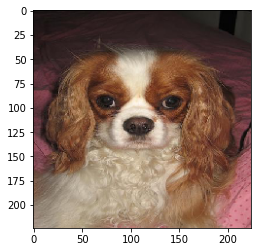

test_y = 5 , predicted = 5


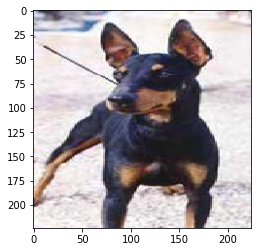

test_y = 7 , predicted = 7


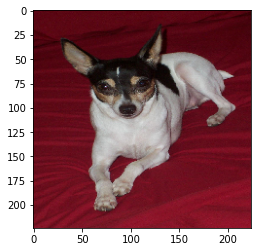

test_y = 7 , predicted = 7


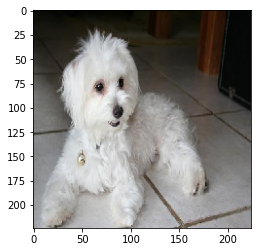

test_y = 2 , predicted = 2


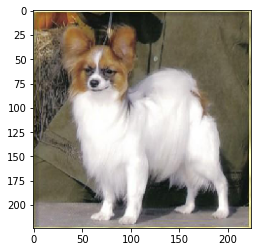

test_y = 6 , predicted = 6


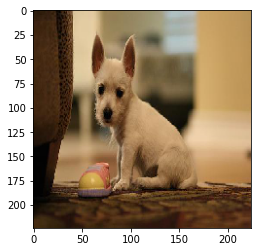

test_y = 7 , predicted = 7


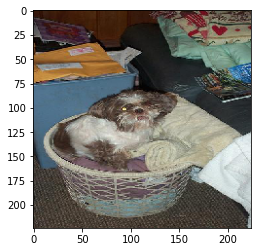

test_y = 4 , predicted = 4


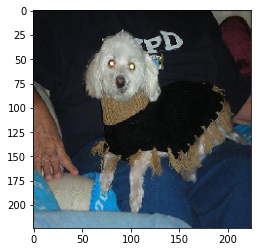

test_y = 2 , predicted = 2


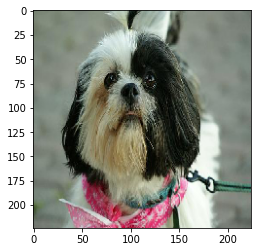

test_y = 4 , predicted = 4


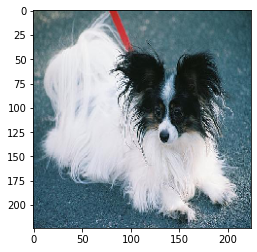

test_y = 6 , predicted = 6


In [ ]:
test_data_generator = ImageDataGenerator(
      # 원 이미지를 그려주기 위해 전처리 함수를 사용 하지 않은 이미지를 읽는다.
      # 모델 호출 시에 직접 전처리 함수를 호출한다.
      # preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=16,
      class_mode='sparse'
)


while True:
  # 한번에 batch_size 16개 만큼 꺼낸다.
  # test_x와 test_y에는 16개가 담겼다.
  test_x, test_y = next(test_data_generator)

  # 모델 호출하기 위해 전처리 함수를 호출하고
  preprocessed_test_x = vgg16.preprocess_input(test_x.copy())

  # 모델로 예측 하고
  y_ = model.predict(preprocessed_test_x)

  # category index를 구한다.
  predicted = np.argmax(y_, axis=1)

  # 16개 이미지에 대하여 각각 그려보고 정답과 예측 값을 출력한다.
  for i, a_image in enumerate(test_x):
    plt.imshow(a_image/255.0)
    plt.show()
    print("test_y =", test_y.astype(int)[i], ", predicted =", predicted[i])
  break



# Resnet으로 전이학습


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications import ResNet50


# conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)


model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict(test_data_generator)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])


Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
24/23 [==============================] - 23s 938ms/step - loss: 54.2898 - acc: 0.6179 - val_loss: 5.4970 - val_acc: 0.8479
Epoch 2/10
24/23 [==============================] - 22s 909ms/step - loss: 5.8646 - acc: 0.8060 - val_loss: 3.8746 - val_acc: 0.8634
Epoch 3/10
24/23 [==============================] - 22s 914ms/step - loss: 4.0566 - acc: 0.8498 - val_loss: 3.0951 - val_acc: 0.8840
Epoch 4/10
24/23 [==============================] - 22s 910ms/step - loss: 3.2300 - acc: 0.8654 - val_loss: 2.1946 - val_acc: 0.8892
Epoch 5/10
24/23 [==============================] - 22s 901ms/step - loss: 2.7893 - acc: 0.8785 - val_loss: 2.6069 - val_acc: 0.8918
Epoch 6/10
24/23 [==============================] - 22s 900ms/step - loss: 2.0347 - acc: 0.9046 - val_loss: 2.4312 - val_acc: 0.9046
Epoch 7/10
24/23 [======================